# Exercises
Using the `titanic` data, in your `classification-exercises` repository, create a notebook, `model.ipynb` where you will do the following:

In [1]:
from env import my_setup
my_setup()


import os
from pydataset import data
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math as m
from scipy import stats
from env import gdb
from env import Percent
from env import output_chi2_contingency
from sklearn.model_selection import train_test_split
import acquire
import prepare
    


In [1]:
import os
from pydataset import data
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math as m
from scipy import stats
from env import gdb
from env import Percent
from env import output_chi2_contingency
from sklearn.model_selection import train_test_split
import acquire
import prepare

In [5]:
df = prepare.prep_titanic()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  891 non-null    int64  
 1   survived      891 non-null    int64  
 2   pclass        891 non-null    int64  
 3   sibsp         891 non-null    int64  
 4   parch         891 non-null    int64  
 5   fare          891 non-null    float64
 6   alone         891 non-null    int64  
 7   sex_male      891 non-null    uint8  
dtypes: float64(1), int64(6), uint8(1)
memory usage: 49.7 KB
None


In [6]:
df

,passenger_id,survived,pclass,sibsp,parch,fare,alone,sex_male
0,0,0,3,1,0,7.2500,0,1
1,1,1,1,1,0,71.2833,0,0
2,2,1,3,0,0,7.9250,1,0
3,3,1,1,1,0,53.1000,0,0
4,4,0,3,0,0,8.0500,1,1
...,...,...,...,...,...,...,...,...
886,886,0,2,0,0,13.0000,1,1
887,887,1,1,0,0,30.0000,1,0
888,888,0,3,1,2,23.4500,0,0
889,889,1,1,0,0,30.0000,1,1


In [4]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report

### 1. What is your baseline prediction? 

In [18]:
survived_mode = df.survived.mode().values[0]

if survived_mode == 1:
    print(f'We think Everyone Survived!! \n{survived_mode = }')
else:
    print(f'We think Everyone DIED! \n{survived_mode = }')

We think Everyone DIED! 
survived_mode = 0


In [22]:
df['baseline'] = df.survived.value_counts().idxmax()
df

,passenger_id,survived,pclass,sibsp,parch,fare,alone,sex_male,baseline
0,0,0,3,1,0,7.2500,0,1,0
1,1,1,1,1,0,71.2833,0,0,0
2,2,1,3,0,0,7.9250,1,0,0
3,3,1,1,1,0,53.1000,0,0,0
4,4,0,3,0,0,8.0500,1,1,0
...,...,...,...,...,...,...,...,...,...
886,886,0,2,0,0,13.0000,1,1,0
887,887,1,1,0,0,30.0000,1,0,0
888,888,0,3,1,2,23.4500,0,0,0
889,889,1,1,0,0,30.0000,1,1,0


In [30]:
df.drop(columns='passenger_id', inplace=True)

### What is your baseline accuracy? 

In [31]:
(df.survived == df.baseline).mean()

0.6161616161616161

### remember: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode). 

### When you make those predictions, what is your accuracy? 

In [32]:
(df.survived == df.baseline).mean()

0.6161616161616161

In [33]:
train, validate, test = prepare.split_data(df, 'survived')

Prepared df: (891, 8)

Train: (534, 8)
Validate: (178, 8)
Test: (179, 8)


In [34]:
(train.survived == train.baseline).mean()

0.6161048689138576

In [35]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 534 entries, 455 to 496
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  534 non-null    int64  
 1   pclass    534 non-null    int64  
 2   sibsp     534 non-null    int64  
 3   parch     534 non-null    int64  
 4   fare      534 non-null    float64
 5   alone     534 non-null    int64  
 6   sex_male  534 non-null    uint8  
 7   baseline  534 non-null    int64  
dtypes: float64(1), int64(6), uint8(1)
memory usage: 33.9 KB


### This is your baseline accuracy.

### 2. Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)

In [41]:
# grab Decision Tree Classifier and some helping friends from sklearn.tree
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
# get classification report for model assessment
from sklearn.metrics import classification_report

In [36]:
X_cols = ['pclass', 'sibsp', 'parch', 'fare', 'alone', 'sex_male']
y_col = 'survived'

In [38]:
X_train, y_train = train[X_cols], train[y_col]

In [39]:
X_validate, y_validate, X_test, Y_test \
= validate[X_cols], validate[y_col], test[X_cols], test[y_col]


In [42]:
model_1 = DecisionTreeClassifier()

In [45]:
X_train.head()

,pclass,sibsp,parch,fare,alone,sex_male
455,3,0,0,7.8958,1,1
380,1,0,0,227.5250,1,0
492,1,0,0,30.5000,1,1
55,1,0,0,35.5000,1,1
243,3,0,0,7.1250,1,1


In [46]:
y_train.head()

455    1
380    1
492    0
55     1
243    0
Name: survived, dtype: int64

### 3. Evaluate your in-sample results using the model score, confusion matrix, and classification report.

In [47]:
model_1.fit(X_train, y_train)

print(f'traing score: {model_1.score(X_train, y_train):.2%}')
print(f'validate score: {model_1.score(X_validate, y_validate):.2%}')

traing score: 94.19%
validate score: 75.28%


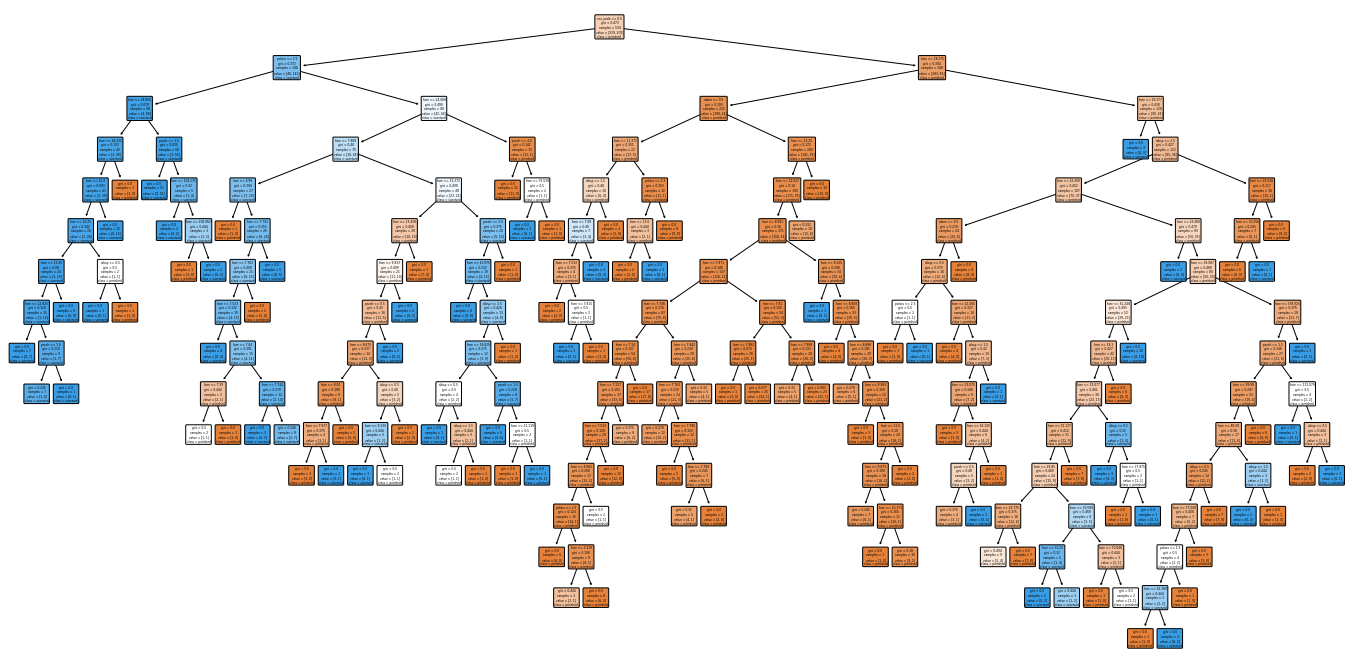

In [50]:
plt.figure(figsize=(24,12))
plot_tree(model_1, 
          feature_names=X_train.columns.to_list(), 
          class_names=['perished', 'survived'],
          filled=True,
          rounded=True
         );

In [51]:
model_1.feature_importances_

array([0.09590748, 0.0622203 , 0.03353685, 0.4279973 , 0.00654879,
       0.37378928])

In [52]:
pd.Series(dict(zip(X_train.columns, model_1.feature_importances_)))

pclass      0.095907
sibsp       0.062220
parch       0.033537
fare        0.427997
alone       0.006549
sex_male    0.373789
dtype: float64

<AxesSubplot:ylabel='Feature Weights'>

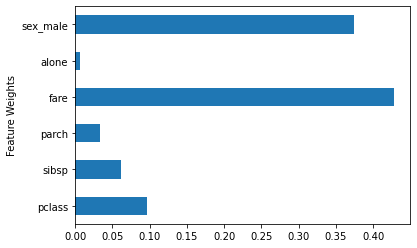

In [58]:
pd.Series(dict(zip(X_train.columns, model_1.feature_importances_))).plot.barh(xlabel='Feature Weights')

### 4. Compute: Accuracy, 

In [94]:
# first, let's create a dataframe for our y predictions and baseline.
preds = pd.DataFrame(
{
    'actual': y_validate.values,
    'baseline': 0,
    'model_1': model_1.predict(X_validate[X_cols]),
    'model_2': model2.predict(X_validate[X_cols]),
#     'model_3': model3.predict(X_validate[X_cols])
})

In [95]:
preds

,actual,baseline,model_1,model_2
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0
...,...,...,...,...
173,1,0,0,0
174,0,0,0,0
175,1,0,1,1
176,1,0,1,1


In [56]:
(y_preds.y_actual == y_preds.baseline).mean()

0.6179775280898876

In [57]:
(y_preds.y_actual == y_preds.model_1).mean()

0.7528089887640449

In [81]:
accuracy_score(y_preds.y_actual, y_preds.model_1)

0.7528089887640449

### true positive rate, 

In [74]:
((y_preds.y_actual == y_preds.model_1) & (y_preds.y_actual == 1)).value_counts()

False    132
True      46
dtype: int64

In [75]:
# true_positive = 
46/178

0.25842696629213485

### false positive rate, 

In [84]:
((y_preds.y_actual != y_preds.model_1) & (y_preds.y_actual == 1)).value_counts()

22

In [77]:
# false_positive = 
22/178

0.12359550561797752

### true negative rate, 

In [73]:
((y_preds.y_actual == y_preds.model_1) & (y_preds.y_actual == 0)).value_counts()

False    90
True     88
dtype: int64

In [78]:
# true_negative = 
88 / 178

0.4943820224719101

### false negative rate, 

In [79]:
((y_preds.y_actual != y_preds.model_1) & (y_preds.y_actual == 0)).value_counts()

False    156
True      22
dtype: int64

In [80]:
# false_negative = 
22 / 178

0.12359550561797752

### precision, 

In [88]:
Percent(precision_score(y_preds.y_actual, y_preds.model_1))

67.65%

### recall, 

In [90]:
Percent(recall_score(y_preds.y_actual, y_preds.model_1))

67.65%

### f1-score, 

In [92]:
print(classification_report(y_preds.y_actual,y_preds.model_1))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80       110
           1       0.68      0.68      0.68        68

    accuracy                           0.75       178
   macro avg       0.74      0.74      0.74       178
weighted avg       0.75      0.75      0.75       178



### and support.

### 5. Run through steps 2-4 using a different max_depth value.

In [93]:
# TODO: create additional models
# change hyperparameters
# change feature sets
# compare model performance on validate
# make a new thing:
model2 = DecisionTreeClassifier(max_depth=4)
# fit a new thing:
model2.fit(X_train, y_train)
# use a new thing:
model2.score(X_train, y_train)

0.8202247191011236

### 2. Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)

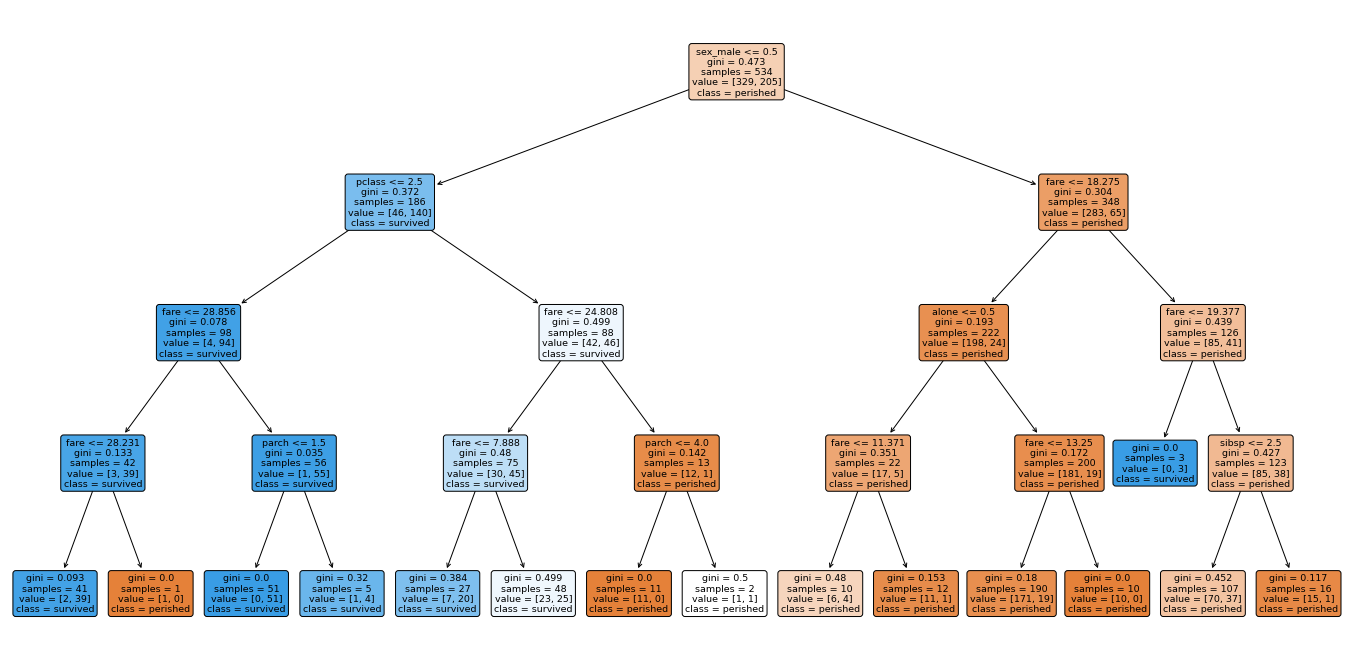

In [98]:
plt.figure(figsize=(24,12))
plot_tree(model2, 
          feature_names=X_train.columns.to_list(), 
          class_names=['perished', 'survived'],
          filled=True,
          rounded=True
         );

<AxesSubplot:ylabel='Feature Weights'>

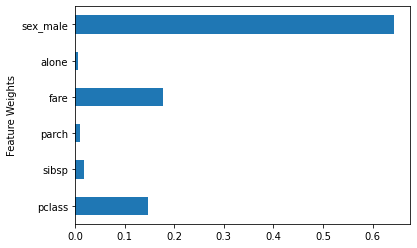

In [99]:
pd.Series(dict(zip(X_train.columns, model2.feature_importances_))).plot.barh(xlabel='Feature Weights')

### 3. Evaluate your in-sample results using the model score, confusion matrix, and classification report.

In [96]:
accuracy_score(preds.actual,preds.model_2)

0.7921348314606742

### 4. Compute: Accuracy, 

### true positive rate, 

In [122]:
TP = ((preds.actual == preds.model_2) & (preds.actual == 1)).value_counts().loc[True]
TPR = TP/len(preds)
TPR

0.25842696629213485

### false positive rate, 

In [121]:
FP = ((preds.actual != preds.model_2) & (preds.actual == 1)).value_counts().loc[True]
FPR = FP/len(preds.actual)
FPR

0.12359550561797752

### true negative rate, 

In [120]:
TN = ((preds.actual == preds.model_2) & (preds.actual == 0)).value_counts().loc[True]
TNR = TN/len(preds)
TNR

0.5337078651685393

### false negative rate, 

In [119]:
FN = ((preds.actual != preds.model_2) & (preds.actual == 0)).value_counts().loc[True]
FNR = FN/len(preds)
FNR

0.08426966292134831

In [123]:
# def confusion():
#     acc = (TP+TN)/(TP+TN+FP+FN)
#     print(f'   Accuracy = {acc:.2%}')
#     print(f'  Precision = {(TP/(TP+FP)):.2%}')
#     print(f'        NPV = {Percent(TN/(TN+FN))}')
#     print(f'     Recall = {Percent(TP/(TP+FN))}')
#     print(f'Specificity = {Percent(TN/(TN+FP))}')

In [562]:
def confusion(TN=TN, TP=TP, FN=FN, FP=FP):
    acc = (TP+TN)/(TP+TN+FP+FN)
    pre = (TP/(TP+FP))
    NPV = (TN/(TN+FN))
    rec = (TP/(TP+FN))
    spe = (TN/(TN+FP))
    f1s = stats.hmean([(TP/(TP+FP)),(TP/(TP+FN))])
    print(
    f'''
    _______________________________________________________________________________________
    
    True Positive = {TP} ---- False Positive = {FP}
    True Negative = {TN} ---- False Negative = {FN}
    
    Out of {TP+FN+FP+TN} predictions -- Correct predictions = {TP+TN} (True Pos + True Neg) 
    
    REAL POSITIVE = (TP + FN) = {TP+FN} ---- PREDICTED POSITIVE = (TP + FP) = {TP+FP}
    
    REAL NEGATIVE = (TN + FP) = {TN+FP} ---- PREDICTED NEGATIVE = (TN + FN) = {TN+FN}
     
        Accuracy = {acc:.2%} -->> Correct Predictions / Total Predictions
       Precision = {pre:.2%} -->> True Positive / Predicted Positive
             NPV = {NPV:.2%} -->> True Negative / Predicted Negative
          Recall = {rec:.2%} -->> True Positive / Real Positive
     Specificity = {spe:.2%} -->> True Negative / Real Negative
        f1-score = {f1s:.2%} -->> Harmonic Mean of Precision and Recall
    _______________________________________________________________________________________
    '''
    )

In [380]:
stats.hmean([(TP/(TP+FP)),(TP/(TP+FN))])

0.9156010230179029

In [125]:
confusion()

   Accuracy = 79.21%
  Precision = 67.65%
        NPV = 86.36%
     Recall = 75.41%
Specificity = 81.20%


### precision, 

### recall, 

### f1-score, 

In [128]:
print(classification_report(preds.actual,preds.model_2), classification_report(preds.actual,preds.model_1))

              precision    recall  f1-score   support

           0       0.81      0.86      0.84       110
           1       0.75      0.68      0.71        68

    accuracy                           0.79       178
   macro avg       0.78      0.77      0.78       178
weighted avg       0.79      0.79      0.79       178
               precision    recall  f1-score   support

           0       0.80      0.80      0.80       110
           1       0.68      0.68      0.68        68

    accuracy                           0.75       178
   macro avg       0.74      0.74      0.74       178
weighted avg       0.75      0.75      0.75       178



### and support.

### 6. Which model performs better on your in-sample data?

In [130]:
preds.model_1

0      0
1      0
2      0
3      0
4      0
      ..
173    0
174    0
175    1
176    1
177    0
Name: model_1, Length: 178, dtype: int64

### 7. Which model performs best on your out-of-sample data, the validate set?

In [131]:
preds.model_2

0      0
1      0
2      0
3      0
4      0
      ..
173    0
174    0
175    1
176    1
177    0
Name: model_2, Length: 178, dtype: int64

### 1. Work through these same exercises using the Telco dataset.

In [140]:
def prep_telco():
    df = acquire.get_telco_data()

    encode = ['partner', 'dependents', 'phone_service', 'internet_service_type', 
             'contract_type', 'paperless_billing', 'payment_type', 'churn']
    
    combine = ['online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies']

    df['null_charges'] = pd.to_numeric(df['total_charges'], errors='coerce').isnull()

    df['total_charges'][df['null_charges'] == True] = df['monthly_charges'][df['null_charges'] == True]

    df.total_charges = df.total_charges.astype(float)

    df.drop(columns= ['null_charges', 'gender', 'multiple_lines', 'customer_id'], inplace=True)

    dummy_df = pd.get_dummies(df[encode], drop_first=True)

    df = pd.concat([df, dummy_df], axis=1)

    df = df.drop(columns=encode)
    print(df.info())
    return df

In [244]:
df = prep_telco()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   senior_citizen                        7043 non-null   int64  
 1   tenure                                7043 non-null   int64  
 2   online_security                       7043 non-null   object 
 3   online_backup                         7043 non-null   object 
 4   device_protection                     7043 non-null   object 
 5   tech_support                          7043 non-null   object 
 6   streaming_tv                          7043 non-null   object 
 7   streaming_movies                      7043 non-null   object 
 8   monthly_charges                       7043 non-null   float64
 9   total_charges                         7043 non-null   float64
 10  partner_Yes                           7043 non-null   uint8  
 11  dependents_Yes   

/var/folders/n7/p9r5pxl53g99g0h4q1_h50fr0000gn/T/ipykernel_88634/3522522056.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_charges'][df['null_charges'] == True] = df['monthly_charges'][df['null_charges'] == True]


In [245]:
combine = ['online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies']

In [237]:
# df['sercvice_add_ons'] = 
df[combine]=='Yes'


,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies
0,False,True,False,True,True,False
1,False,False,False,False,False,True
2,False,False,True,False,False,False
3,False,True,True,False,True,True
4,False,False,False,True,True,False
...,...,...,...,...,...,...
7038,True,False,False,True,False,False
7039,False,False,False,False,False,True
7040,False,True,False,False,False,False
7041,True,False,True,True,False,True


In [247]:
df.online_backup.value_counts(dropna=False)

No                     3088
Yes                    2429
No internet service    1526
Name: online_backup, dtype: int64

In [168]:
# df['services']=
df.online_backup.map({'Yes': 1, 'No': 0 })

0       1.0
1       0.0
2       0.0
3       1.0
4       0.0
       ... 
7038    0.0
7039    0.0
7040    1.0
7041    0.0
7042    1.0
Name: online_backup, Length: 7043, dtype: float64

In [248]:
for i in combine:
    df[i] = df[i].map({'Yes': 1, 'No': 0, 'No internet service': 0 })
df[combine]

,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies
0,0,1,0,1,1,0
1,0,0,0,0,0,1
2,0,0,1,0,0,0
3,0,1,1,0,1,1
4,0,0,0,1,1,0
...,...,...,...,...,...,...
7038,1,0,0,1,0,0
7039,0,0,0,0,0,1
7040,0,1,0,0,0,0
7041,1,0,1,1,0,1


In [249]:
df.online_backup.value_counts(dropna=False)

0    4614
1    2429
Name: online_backup, dtype: int64

In [250]:
df['services'] = df.online_backup + df.online_security + df.device_protection + df.tech_support + df.streaming_movies + df.streaming_tv

In [251]:
df.drop(columns=combine, inplace=True)

In [252]:
df.services.value_counts(dropna=False)

0    2219
3    1118
2    1033
1     966
4     852
5     571
6     284
Name: services, dtype: int64

In [253]:
df[(df['contract_type_Two year'] == 1) & (df.tenure < 25)]


,senior_citizen,tenure,monthly_charges,total_charges,partner_Yes,dependents_Yes,phone_service_Yes,internet_service_type_Fiber optic,internet_service_type_None,contract_type_One year,contract_type_Two year,paperless_billing_Yes,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check,churn_Yes,services
34,0,20,39.40,825.40,1,1,0,0,0,0,1,1,1,0,0,0,3
38,0,12,20.30,224.50,1,1,1,0,1,0,1,0,0,0,0,0,0
96,0,24,19.55,470.20,0,0,1,0,1,0,1,1,0,0,0,0,0
132,0,8,20.15,165.50,1,1,1,0,1,0,1,0,0,0,1,0,0
208,0,3,26.40,121.25,0,1,1,0,1,0,1,1,0,0,1,0,0
227,0,23,19.60,426.65,1,1,1,0,1,0,1,0,1,0,0,0,0
309,0,13,35.40,450.40,0,0,0,0,0,0,1,0,0,0,1,0,2
328,0,11,19.65,225.75,1,1,1,0,1,0,1,0,0,0,1,0,0
423,0,10,29.60,299.05,0,0,0,0,0,0,1,1,0,0,1,0,1
518,0,4,19.90,76.65,1,1,1,0,1,0,1,0,0,0,1,0,0


In [254]:
df.drop(index=(df[(df['contract_type_Two year'] == 1) & (df.tenure < 25)].index), inplace=True)

In [255]:
df.drop(index=(df[(df['contract_type_One year'] == 1) & (df.tenure < 13)].index), inplace=True)

In [256]:
df.services.value_counts(dropna=False)


0    2026
3    1087
2    1013
1     960
4     835
5     559
6     281
Name: services, dtype: int64

In [257]:
# df.services.map({df.services[(df.services != 1) &(df.services !=2) &(df.services != 3) & (df.services != 4) & (df.services != 5) & (df.services != 6)]: 0})

In [258]:
train, validate, test = prepare.split_data(df,'churn_Yes')

Prepared df: (6761, 17)

Train: (4056, 17)
Validate: (1352, 17)
Test: (1353, 17)


In [270]:
train

,senior_citizen,tenure,monthly_charges,total_charges,partner_Yes,dependents_Yes,phone_service_Yes,internet_service_type_Fiber optic,internet_service_type_None,contract_type_One year,contract_type_Two year,paperless_billing_Yes,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check,churn_Yes,services
1609,0,27,20.35,531.60,0,0,1,0,1,0,1,0,1,0,0,0,0
2873,0,20,20.65,417.50,1,0,1,0,1,1,0,0,0,0,1,0,0
5080,0,23,20.15,405.60,0,0,1,0,1,1,0,0,0,0,0,0,0
4172,0,31,89.30,2823.00,1,1,1,1,0,0,0,0,0,1,0,0,3
841,0,6,26.35,184.05,0,1,1,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2091,1,32,104.90,3351.55,1,0,1,1,0,0,0,1,0,1,0,1,4
428,1,21,41.90,840.10,0,0,0,0,0,0,0,1,0,1,0,1,2
1129,1,18,95.45,1752.55,0,0,1,1,0,0,0,1,0,1,0,1,2
2939,0,5,94.45,498.10,1,0,1,1,0,0,0,1,0,1,0,1,3


In [276]:
X_cols = train.columns.to_list()
X_cols.remove('churn_Yes')
y_col = 'churn_Yes'

In [277]:
X_cols

['senior_citizen',
 'tenure',
 'monthly_charges',
 'total_charges',
 'partner_Yes',
 'dependents_Yes',
 'phone_service_Yes',
 'internet_service_type_Fiber optic',
 'internet_service_type_None',
 'contract_type_One year',
 'contract_type_Two year',
 'paperless_billing_Yes',
 'payment_type_Credit card (automatic)',
 'payment_type_Electronic check',
 'payment_type_Mailed check',
 'services']

In [278]:
X_train, y_train = train[X_cols], train[y_col]

In [279]:
X_validate, y_validate = validate[X_cols], validate[y_col]
X_test, y_test = test[X_cols], test[y_col]

In [280]:
# make the thing
model_1 = DecisionTreeClassifier()
# fit the thing
model_1.fit(X_train, y_train)
# use the thing
print(f'training score: {model_1.score(X_train, y_train):.2%}')
print(f'validate score: {model_1.score(X_validate, y_validate):.2%}')

training score: 99.78%
validate score: 70.56%


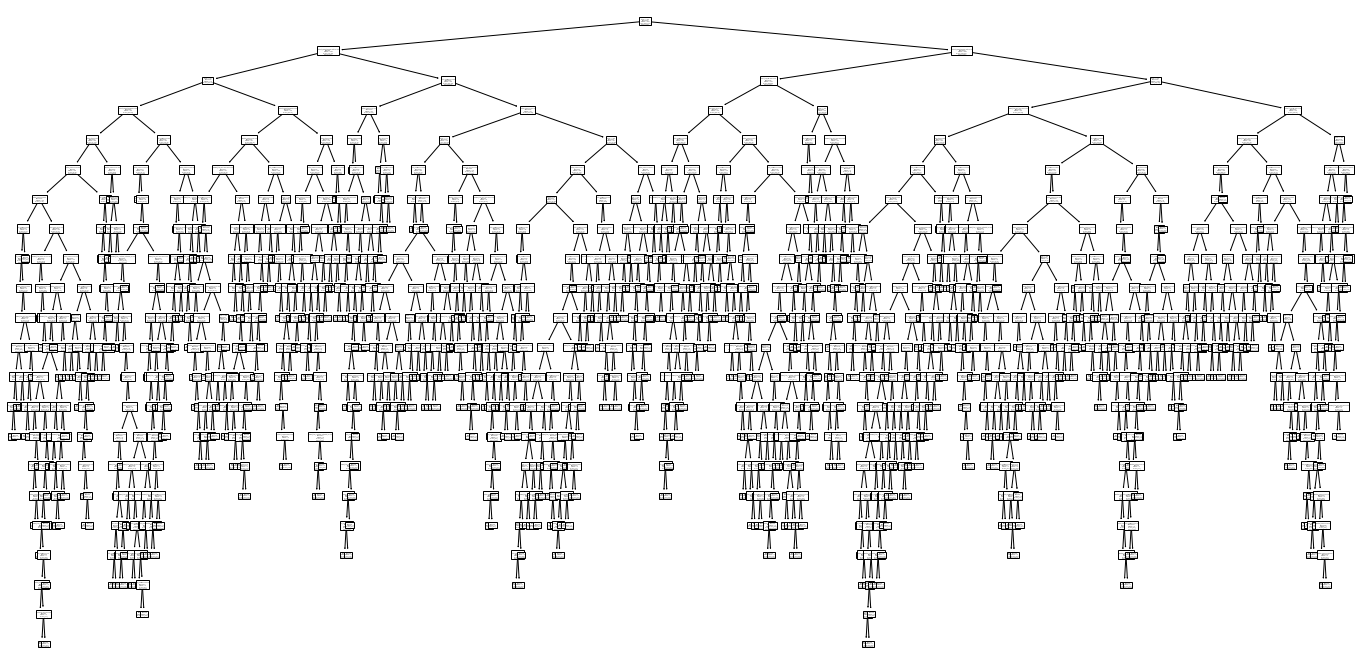

In [281]:
plt.figure(figsize=(24,12))
plot_tree(model_1, feature_names=X_train.columns.to_list(), class_names=['stayed', 'churned']);

In [282]:
model_2 = DecisionTreeClassifier(max_depth=5)
model_2.fit(X_train, y_train)
print(f'training score: {model_2.score(X_train, y_train):.2%}')
print(f'validate score: {model_2.score(X_validate, y_validate):.2%}')

training score: 79.78%
validate score: 77.22%


In [283]:
print(classification_report(preds.actual,preds.model_2), classification_report(preds.actual,preds.model_1))

              precision    recall  f1-score   support

           0       0.81      0.86      0.84       110
           1       0.75      0.68      0.71        68

    accuracy                           0.79       178
   macro avg       0.78      0.77      0.78       178
weighted avg       0.79      0.79      0.79       178
               precision    recall  f1-score   support

           0       0.80      0.80      0.80       110
           1       0.68      0.68      0.68        68

    accuracy                           0.75       178
   macro avg       0.74      0.74      0.74       178
weighted avg       0.75      0.75      0.75       178



In [284]:
model_3 = DecisionTreeClassifier(max_depth=3)
model_3.fit(train[X_cols], train[y_col])
print(f'training score: {model_3.score(X_train, y_train):.2%}')
print(f'validate score: {model_3.score(X_validate, y_validate):.2%}')

training score: 78.06%
validate score: 78.92%


In [286]:
preds = pd.DataFrame(
{
    'actual': validate.churn_Yes,
    'baseline': 0,
    'model_1': model_1.predict(validate[X_cols]),
    'model_2': model_2.predict(validate[X_cols]),
    'model_3': model_3.predict(validate[X_cols])
})

/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- contract_type_One year
- contract_type_Two year
- dependents_Yes
- internet_service_type_Fiber optic
- internet_service_type_None
- ...
Feature names seen at fit time, yet now missing:
- alone
- fare
- parch
- pclass
- sex_male
- ...

  warnings.warn(message, FutureWarning)


ValueError: X has 16 features, but DecisionTreeClassifier is expecting 6 features as input.

### 2. Experiment with this model on other datasets with a higher number of output classes.

# Exercises — Random Forest Classifier
Continue working in your `model` file with `titanic` data to do the following:

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

In [290]:
df = prepare.prep_titanic()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  891 non-null    int64  
 1   survived      891 non-null    int64  
 2   pclass        891 non-null    int64  
 3   sibsp         891 non-null    int64  
 4   parch         891 non-null    int64  
 5   fare          891 non-null    float64
 6   alone         891 non-null    int64  
 7   sex_male      891 non-null    uint8  
dtypes: float64(1), int64(6), uint8(1)
memory usage: 49.7 KB
None


In [292]:
df.drop(columns='passenger_id', inplace=True)

In [293]:
train, validate, test = prepare.split_data(df, 'survived')

Prepared df: (891, 7)

Train: (534, 7)
Validate: (178, 7)
Test: (179, 7)


In [296]:
X_cols = df.columns.drop('survived').to_list()
y_col = 'survived'

In [306]:
X_cols, y_col

(['pclass', 'sibsp', 'parch', 'fare', 'alone', 'sex_male'], 'survived')

In [298]:
X_train = train[X_cols]
y_train = train[y_col]
X_val = validate[X_cols]
y_val = validate[y_col]
X_test = test[X_cols]
y_test = test[y_col]

In [307]:
y_train

455    1
380    1
492    0
55     1
243    0
      ..
695    0
128    1
636    0
222    0
496    1
Name: survived, Length: 534, dtype: int64

### 1. Fit the Random Forest classifier to your training sample and transform (i.e. make predictions on the training sample) setting the random_state accordingly and setting min_samples_leaf = 1 and max_depth = 10.

In [300]:
rf = RandomForestClassifier(random_state=1491, min_samples_leaf=1, max_depth=10)

In [301]:
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, random_state=1491)

In [303]:
model_1 = rf.predict(X_train)
model_1

array([0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,

In [332]:
y_train

455    1
380    1
492    0
55     1
243    0
      ..
695    0
128    1
636    0
222    0
496    1
Name: survived, Length: 534, dtype: int64

In [343]:
preds = pd.DataFrame({
    'actual': y_train,
    'baseline': 0,
    'model_1': model_1
})
# pd.DataFrame(preds)

In [344]:
preds

,actual,baseline,model_1
455,1,0,0
380,1,0,1
492,0,0,1
55,1,0,1
243,0,0,0
...,...,...,...
695,0,0,0
128,1,0,1
636,0,0,0
222,0,0,0


In [351]:
Percent((preds.actual == preds.model_1).mean())

93.82%

### 2. Evaluate your results using the model score, confusion matrix, and classification report.

In [347]:
print(rf.feature_importances_)

[0.09636529 0.06653273 0.04592959 0.42599093 0.01919994 0.34598151]


<function matplotlib.pyplot.show(close=None, block=None)>

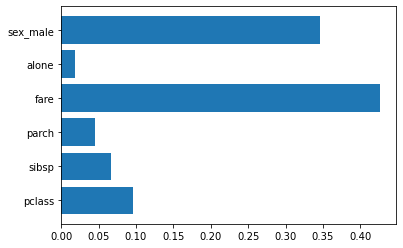

In [350]:
plt.barh(X_train.columns, rf.feature_importances_)
plt.show

# 800-721-0627 Dad's insurance customer support

In [352]:
confusion_matrix(preds.actual,preds.model_1)

array([[322,   7],
       [ 26, 179]])

In [354]:
rf.predict_proba(X_train)

array([[0.94691117, 0.05308883],
       [0.01      , 0.99      ],
       [0.41335172, 0.58664828],
       ...,
       [0.84465653, 0.15534347],
       [0.94362427, 0.05637573],
       [0.01222222, 0.98777778]])

In [3]:
from sklearn.metrics import ConfusionMatrixDisplay

In [368]:
cm = confusion_matrix(preds.actual,preds.model_1)
cm

array([[322,   7],
       [ 26, 179]])

In [367]:
preds.actual.value_counts()

0    329
1    205
Name: actual, dtype: int64

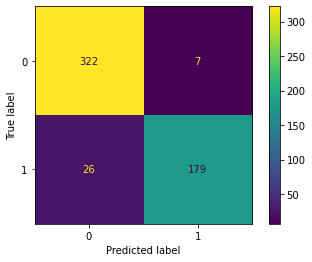

In [366]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)

disp.plot()
plt.show()

In [371]:
TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]
TP = cm[1,1]

In [388]:
print(classification_report(preds.actual,preds.model_1))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95       329
           1       0.96      0.87      0.92       205

    accuracy                           0.94       534
   macro avg       0.94      0.93      0.93       534
weighted avg       0.94      0.94      0.94       534



### 3. Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [386]:
confusion()


    _______________________________________________________________________________________
    
    True Positive = 179 ---- False Positive = 7
    True Negative = 322 ---- False Negative = 26
    
    Out of 534 predictions -- Correct predictions = 501 (True Pos + True Neg) 
    
    REAL POSITIVE = (TP + FN) = 205 ---- PREDICTED POSITIVE = (TP + FP) = 186
    
    REAL NEGATIVE = (TN + FP) = 329 ---- PREDICTED NEGATIVE = (TN + FN) = 348
     
        Accuracy = 93.82% -->> Correct Predictions / Total Predictions
       Precision = 96.24% -->> True Positive / Predicted Positive
             NPV = 92.53% -->> True Negative / Predicted Negative
          Recall = 87.32% -->> True Positive / Real Positive
     Specificity = 97.87% -->> True Negative / Real Negative
        f1-score = 91.56% -->> Harmonic Mean of Precision and Recall
    _______________________________________________________________________________________
    


### 4. Run through steps increasing your min_samples_leaf and decreasing your max_depth.

In [575]:
def random_forest_models(num_models, rand_st=123, positive=1, max_samp=1.0, trees=100):
    '''
    random_forest_models is a function that:
        
        Takes in:   num_models=  >> The number of rf models 
                                  you want to create  ;dtype(int)
                       rand_st=  >> Random State  
                                  ;dtype(int) = 123 unless specified
                      positive=  >> what is the positive test 
                                  (0 or 1)
                      max_samp=  >> maximum samples per tree
                                  ;dtype(int, float) = (default)1.0
                                  if int: = number of samples
                                  if float: = percentage of total samples
                         trees=  >> n_estimators: number of trees in the forest
        
Assumed variables apply:
    
                  train: training dataset
               validate: validate dataset
                   test: test dataset

                 X_cols = df.columns.drop('target_y').to_list()
                  y_col = 'target_y'

                X_train = train[X_cols]
                y_train = train[y_col]
                  X_val = validate[X_cols]
                  y_val = validate[y_col]
                 X_test = test[X_cols]
                 y_test = test[y_col]
                 
        Returns: a DataFrame with predictions for each model
    '''
    b = int(y_train.mode())
    preds = pd.DataFrame({
    'actual': y_train,
    'baseline': b,
    })
    depth = 11 #num_models * 2 + 1
#     fig, ax = plt.subplot(nrows = num_models,n)
    for i in range(1, num_models+1):
        depth -= 1
        name = f'model_{i}_depth_{depth}'
        
        rf = RandomForestClassifier(random_state = rand_st, 
                                    min_samples_leaf = i, 
                                    max_depth = depth,
                                    max_samples = max_samp,
                                    n_estimators = trees
                                   )
        rf.fit(X_train, y_train)
        
        preds[name] = rf.predict(X_train)
#         val_name = f'{name}_validate'
        TN, FP, FN, TP = confusion_matrix(preds.actual, preds[name]).ravel()
        print(f'\n{name}\n\n {rf}')
        confusion(TN=TN, TP=TP, FN=FN, FP=FP)
        print(f'Validation score is: {rf.score(X_val, y_val):.2%}')
        print('______________________________')
#         preds[val_name] = rf.predict(X_val)
#         plt.subplot(i,i,12)
#         plt.title(f'{name} feature importances')
#         plt.barh(X_train.columns, rf.feature_importances_)
#         plt.show
                
    return preds

In [576]:
preds = random_forest_models(7, max_samp=.6, trees= 1000)


model_1_depth_10

 RandomForestClassifier(max_depth=10, max_samples=0.6, n_estimators=1000,
                       random_state=123)

    _______________________________________________________________________________________
    
    True Positive = 173 ---- False Positive = 11
    True Negative = 318 ---- False Negative = 32
    
    Out of 534 predictions -- Correct predictions = 491 (True Pos + True Neg) 
    
    REAL POSITIVE = (TP + FN) = 205 ---- PREDICTED POSITIVE = (TP + FP) = 184
    
    REAL NEGATIVE = (TN + FP) = 329 ---- PREDICTED NEGATIVE = (TN + FN) = 350
     
        Accuracy = 91.95% -->> Correct Predictions / Total Predictions
       Precision = 94.02% -->> True Positive / Predicted Positive
             NPV = 90.86% -->> True Negative / Predicted Negative
          Recall = 84.39% -->> True Positive / Real Positive
     Specificity = 96.66% -->> True Negative / Real Negative
        f1-score = 88.95% -->> Harmonic Mean of Precision and Recall
    ________________

In [489]:
preds

,actual,baseline,model_1_depth_10,model_2_depth_9,model_3_depth_8,model_4_depth_7,model_5_depth_6,model_6_depth_5,model_7_depth_4
455,1,0,0,0,0,0,0,0,0
380,1,0,1,1,1,1,1,1,1
492,0,0,1,1,1,1,0,0,0
55,1,0,1,0,0,0,0,0,0
243,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
695,0,0,0,0,0,0,0,0,0
128,1,0,1,1,1,1,1,1,1
636,0,0,0,0,0,0,0,0,0
222,0,0,0,0,0,0,0,0,0


### 5. What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?

In [490]:
for i in preds:
    cm = confusion_matrix(preds.actual,preds[i])
    print(f'''{i}, 
{cm}
_________________''')

actual, 
[[329   0]
 [  0 205]]
_________________
baseline, 
[[329   0]
 [205   0]]
_________________
model_1_depth_10, 
[[322   7]
 [ 25 180]]
_________________
model_2_depth_9, 
[[315  14]
 [ 46 159]]
_________________
model_3_depth_8, 
[[311  18]
 [ 52 153]]
_________________
model_4_depth_7, 
[[309  20]
 [ 58 147]]
_________________
model_5_depth_6, 
[[309  20]
 [ 63 142]]
_________________
model_6_depth_5, 
[[308  21]
 [ 65 140]]
_________________
model_7_depth_4, 
[[305  24]
 [ 64 141]]
_________________


### 6. After making a few models, which one has the best performance (or closest metrics) on both train and validate?

In [554]:
rf = RandomForestClassifier(random_state = 123, 
                                    min_samples_leaf = 10, 
                                    max_depth = 6
                                   )
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=10, random_state=123)

In [555]:
rf.score(X_train, y_train)

0.8370786516853933

In [556]:
rf.score(X_val, y_val)

0.797752808988764

In [557]:
rf.score(X_test, y_test)

0.7877094972067039

# Exercises
Continue working in your `model` file with the `titanic` dataset.

In [620]:
df = prepare.prep_titanic()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  891 non-null    int64  
 1   survived      891 non-null    int64  
 2   pclass        891 non-null    int64  
 3   sibsp         891 non-null    int64  
 4   parch         891 non-null    int64  
 5   fare          891 non-null    float64
 6   alone         891 non-null    int64  
 7   sex_male      891 non-null    uint8  
dtypes: float64(1), int64(6), uint8(1)
memory usage: 49.7 KB
None


In [621]:
df['with_x_people'] = df.sibsp + df.parch

In [622]:
df.drop(columns=['passenger_id', 'alone', 'sibsp', 'parch'], inplace=True)

In [623]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   survived       891 non-null    int64  
 1   pclass         891 non-null    int64  
 2   fare           891 non-null    float64
 3   sex_male       891 non-null    uint8  
 4   with_x_people  891 non-null    int64  
dtypes: float64(1), int64(3), uint8(1)
memory usage: 28.8 KB


In [606]:
for i in df:
    print(df[i].unique())
    

[0 1]
[3 1 2]
[  7.25    71.2833   7.925   53.1      8.05     8.4583  51.8625  21.075
  11.1333  30.0708  16.7     26.55    31.275    7.8542  16.      29.125
  13.      18.       7.225   26.       8.0292  35.5     31.3875 263.
   7.8792   7.8958  27.7208 146.5208   7.75    10.5     82.1708  52.
   7.2292  11.2417   9.475   21.      41.5792  15.5     21.6792  17.8
  39.6875   7.8     76.7292  61.9792  27.75    46.9     80.      83.475
  27.9     15.2458   8.1583   8.6625  73.5     14.4542  56.4958   7.65
  29.      12.475    9.       9.5      7.7875  47.1     15.85    34.375
  61.175   20.575   34.6542  63.3583  23.      77.2875   8.6542   7.775
  24.15     9.825   14.4583 247.5208   7.1417  22.3583   6.975    7.05
  14.5     15.0458  26.2833   9.2167  79.2      6.75    11.5     36.75
   7.7958  12.525   66.6      7.3125  61.3792   7.7333  69.55    16.1
  15.75    20.525   55.      25.925   33.5     30.6958  25.4667  28.7125
   0.      15.05    39.      22.025   50.       8.4042   6.495

In [624]:

train, validate, test = prepare.split_data(df, 'survived')

Prepared df: (891, 5)

Train: (534, 5)
Validate: (178, 5)
Test: (179, 5)


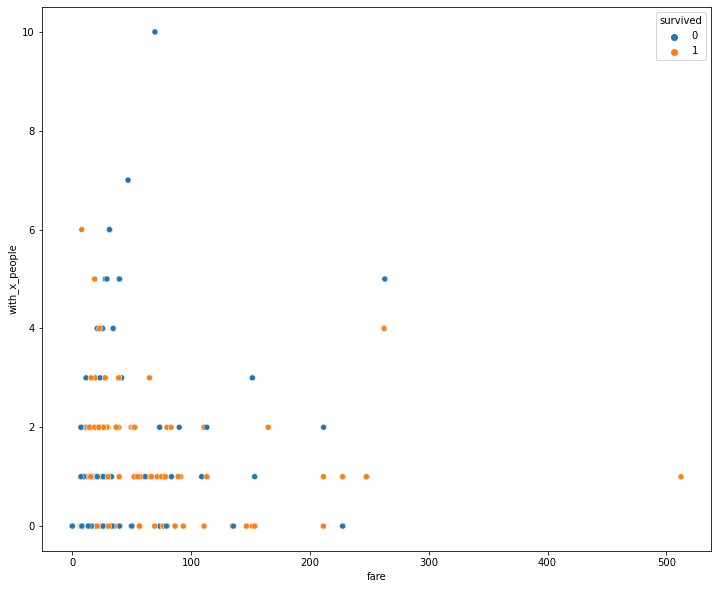

In [688]:
plt.figure(figsize=(12,10))
sns.scatterplot(x=train.fare,
                y=train.with_x_people,
#                 style=train.sex_male,
                hue=train.survived,
#                 size=train.survived
               )
plt.show()

<class 'matplotlib.axes._subplots.Axes3DSubplot'>


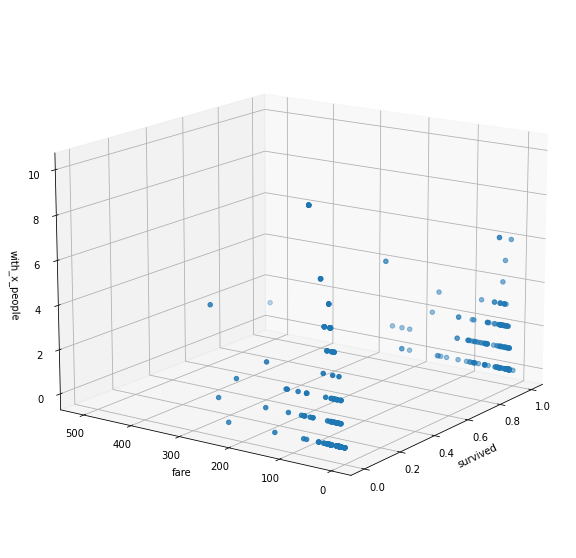

In [633]:
plt.figure(figsize=(12,10))
axes = plt.axes(projection='3d')
print(type(axes))
axes.scatter3D(train.survived, train.fare, train.with_x_people)

axes.set_xlabel('survived')
axes.set_ylabel('fare')
axes.set_zlabel('with_x_people')
axes.view_init(15, 215)
plt.show()

In [625]:
X_cols = df.columns.drop('survived').to_list()
y_col = 'survived'

In [626]:
X_train = train[X_cols]
y_train = train[y_col]
X_val = validate[X_cols]
y_val = validate[y_col]
X_test = test[X_cols]
y_test = test[y_col]

### 1. Fit a K-Nearest Neighbors classifier to your training sample and transform (i.e. make predictions on the training sample)

In [584]:
from sklearn.neighbors import KNeighborsClassifier

In [634]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [635]:
preds= knn.predict(X_train)

In [636]:
preds

array([0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,

In [637]:
preds_prob = knn.predict_proba(X_train)

In [638]:
preds_prob

array([[0.8, 0.2],
       [0.4, 0.6],
       [0.4, 0.6],
       ...,
       [0.8, 0.2],
       [1. , 0. ],
       [0.2, 0.8]])

### 2. Evaluate your results using the model score, confusion matrix, and classification report.

In [639]:
pd.crosstab(y_train, preds)

col_0,0,1
survived,,
0,274,55
1,47,158


In [640]:
print(classification_report(y_train, preds))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84       329
           1       0.74      0.77      0.76       205

    accuracy                           0.81       534
   macro avg       0.80      0.80      0.80       534
weighted avg       0.81      0.81      0.81       534



### 3. Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [641]:
confusion(TN = 274, TP = 158, FN = 47, FP = 55)


    _______________________________________________________________________________________
    
    True Positive = 158 ---- False Positive = 55
    True Negative = 274 ---- False Negative = 47
    
    Out of 534 predictions -- Correct predictions = 432 (True Pos + True Neg) 
    
    REAL POSITIVE = (TP + FN) = 205 ---- PREDICTED POSITIVE = (TP + FP) = 213
    
    REAL NEGATIVE = (TN + FP) = 329 ---- PREDICTED NEGATIVE = (TN + FN) = 321
     
        Accuracy = 80.90% -->> Correct Predictions / Total Predictions
       Precision = 74.18% -->> True Positive / Predicted Positive
             NPV = 85.36% -->> True Negative / Predicted Negative
          Recall = 77.07% -->> True Positive / Real Positive
     Specificity = 83.28% -->> True Negative / Real Negative
        f1-score = 75.60% -->> Harmonic Mean of Precision and Recall
    _______________________________________________________________________________________
    


### 4. Run through steps 2-4 setting k to 10

In [648]:
knn_10 = KNeighborsClassifier(n_neighbors=10)
knn_10.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [649]:
preds_10 = knn_10.predict(X_train)
preds_10

array([0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,

In [650]:
pd.crosstab(y_train, preds_10)

col_0,0,1
survived,,
0,278,51
1,61,144


In [651]:
print(classification_report(y_train, preds_10))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83       329
           1       0.74      0.70      0.72       205

    accuracy                           0.79       534
   macro avg       0.78      0.77      0.78       534
weighted avg       0.79      0.79      0.79       534



In [652]:
confusion(TN = 278, TP = 144, FN = 61, FP = 51)


    _______________________________________________________________________________________
    
    True Positive = 144 ---- False Positive = 51
    True Negative = 278 ---- False Negative = 61
    
    Out of 534 predictions -- Correct predictions = 422 (True Pos + True Neg) 
    
    REAL POSITIVE = (TP + FN) = 205 ---- PREDICTED POSITIVE = (TP + FP) = 195
    
    REAL NEGATIVE = (TN + FP) = 329 ---- PREDICTED NEGATIVE = (TN + FN) = 339
     
        Accuracy = 79.03% -->> Correct Predictions / Total Predictions
       Precision = 73.85% -->> True Positive / Predicted Positive
             NPV = 82.01% -->> True Negative / Predicted Negative
          Recall = 70.24% -->> True Positive / Real Positive
     Specificity = 84.50% -->> True Negative / Real Negative
        f1-score = 72.00% -->> Harmonic Mean of Precision and Recall
    _______________________________________________________________________________________
    


### 5. Run through setps 2-4 setting k to 20

In [653]:
knn_20 = KNeighborsClassifier(n_neighbors=20)
knn_20.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=20)

In [654]:
preds_20 = knn_20.predict(X_train)
preds_20

array([0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [655]:
pd.crosstab(y_train, preds_20)

col_0,0,1
survived,,
0,277,52
1,83,122


In [656]:
print(classification_report(y_train, preds_20))

              precision    recall  f1-score   support

           0       0.77      0.84      0.80       329
           1       0.70      0.60      0.64       205

    accuracy                           0.75       534
   macro avg       0.74      0.72      0.72       534
weighted avg       0.74      0.75      0.74       534



In [658]:
confusion(TN = 277, TP = 122, FN = 83, FP = 52)


    _______________________________________________________________________________________
    
    True Positive = 122 ---- False Positive = 52
    True Negative = 277 ---- False Negative = 83
    
    Out of 534 predictions -- Correct predictions = 399 (True Pos + True Neg) 
    
    REAL POSITIVE = (TP + FN) = 205 ---- PREDICTED POSITIVE = (TP + FP) = 174
    
    REAL NEGATIVE = (TN + FP) = 329 ---- PREDICTED NEGATIVE = (TN + FN) = 360
     
        Accuracy = 74.72% -->> Correct Predictions / Total Predictions
       Precision = 70.11% -->> True Positive / Predicted Positive
             NPV = 76.94% -->> True Negative / Predicted Negative
          Recall = 59.51% -->> True Positive / Real Positive
     Specificity = 84.19% -->> True Negative / Real Negative
        f1-score = 64.38% -->> Harmonic Mean of Precision and Recall
    _______________________________________________________________________________________
    


### 6. What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?

In [667]:
pd.DataFrame([{'model k=5': 0.81, 
 'model k=10': 0.79,
 'model k=20': 0.75
}])

,model k=5,model k=10,model k=20
0,0.81,0.79,0.75


### 7. Which model performs best on our out-of-sample data from validate?

In [670]:
knn_5_val = knn.predict(X_val)

In [671]:
knn_10_val = knn_10.predict(X_val)

In [672]:
knn_20_val = knn_20.predict(X_val)

In [675]:
prerdictions_train = pd.DataFrame({
    'actual_train': y_train,
    'knn_5_train': preds,
    'knn_10_train': preds_10,
    'knn_20_train': preds_20
    })

In [676]:
predictions_val = pd.DataFrame({
    'actual_val': y_val,
    'knn_5_val': knn_5_val,
    'knn_10_val': knn_10_val,
    'knn_20_val': knn_20_val
})

In [677]:
for i in predictions_val:
    print(classification_report(predictions_val.actual_val,predictions_val[i]))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       110
           1       1.00      1.00      1.00        68

    accuracy                           1.00       178
   macro avg       1.00      1.00      1.00       178
weighted avg       1.00      1.00      1.00       178

              precision    recall  f1-score   support

           0       0.83      0.77      0.80       110
           1       0.67      0.74      0.70        68

    accuracy                           0.76       178
   macro avg       0.75      0.75      0.75       178
weighted avg       0.76      0.76      0.76       178

              precision    recall  f1-score   support

           0       0.79      0.78      0.79       110
           1       0.65      0.66      0.66        68

    accuracy                           0.74       178
   macro avg       0.72      0.72      0.72       178
weighted avg       0.74      0.74      0.74       178

              preci

In [691]:
model_set = []
for i in range(1,11):
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train, y_train)
    model_set.append(clf)
    
for i in model_set:
    disp = i.predict(X_train)
    disp1 = i.predict(X_val)
    print(i,'\n')
    print(classification_report(y_train, disp))
    print('\n\nValidate:\n')
    print(classification_report(y_val,disp1))
    print('_________________________________________________________\n')

KNeighborsClassifier(n_neighbors=1) 

              precision    recall  f1-score   support

           0       0.95      0.88      0.91       329
           1       0.83      0.92      0.87       205

    accuracy                           0.90       534
   macro avg       0.89      0.90      0.89       534
weighted avg       0.90      0.90      0.90       534



Validate:

              precision    recall  f1-score   support

           0       0.78      0.72      0.75       110
           1       0.60      0.68      0.63        68

    accuracy                           0.70       178
   macro avg       0.69      0.70      0.69       178
weighted avg       0.71      0.70      0.71       178

_________________________________________________________

KNeighborsClassifier(n_neighbors=2) 

              precision    recall  f1-score   support

           0       0.84      0.98      0.90       329
           1       0.95      0.71      0.81       205

    accuracy                      

## Accuracy got worse for both the training set and the validation sets:
####  - As the number (k) of Nearest neighbors used went up, accuracy went down!

## Part of this is probably because the data isn't normalized or scaled in any way...

  - additionaly, most of the data is basically categoricay and/or discrete

  - as such, the 'works best with scaled, continuous data' criteria wasn't met

###  - conclusion: KNN is not very helpful for the titanic datset

# Exercises
In these exercises, we'll continue working with the `titanic` dataset and building logistic regression models. Throughout this exercise, be sure you are training, evaluation, and comparing models on the `train` and `validate` datasets. The `test` dataset should only be used for your final model.

For all of the models you create, choose a threshold that optimizes for accuracy.

Do your work for these exercises in either a notebook or a python script named `model` within your `classification-exercises` repository. Add, commit, and push your work.

In [6]:
from modeling import confusion, random_forest_models
from sklearn.linear_model import LogisticRegression

### 1. Create a model that includes age in addition to fare and pclass. Does this model perform better than your baseline?

In [9]:
df = acquire.get_titanic_data()

In [10]:
df

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,2,male,27.0,0,0,13.0000,S,Second,NaN,Southampton,1
887,887,1,1,female,19.0,0,0,30.0000,S,First,B,Southampton,1
888,888,0,3,female,NaN,1,2,23.4500,S,Third,NaN,Southampton,0
889,889,1,1,male,26.0,0,0,30.0000,C,First,C,Cherbourg,1


In [16]:
cols = df.columns.drop(['passenger_id', 'sex', 'sibsp', 'parch', 'embarked', 'class', 'deck', 'embark_town', 'alone'])
cols

Index(['survived', 'pclass', 'age', 'fare'], dtype='object')

In [17]:
X_cols = cols.drop('survived').to_list()
y_col = 'survived'

In [18]:
train, validate, test = prepare.split_data(df[cols], 'survived')

Prepared df: (891, 4)

Train: (534, 4)
Validate: (178, 4)
Test: (179, 4)


In [19]:
X_train = train[X_cols]
y_train = train[y_col]

In [20]:
X_val = validate[X_cols]
y_val = validate[y_col]

In [21]:
X_test = test[X_cols]
y_test = test[y_col]

### 2. Include sex in your model as well. Note that you'll need to encode or create a dummy variable of this feature before including it in a model.

### 3. Try out other combinations of features and models.

### 4. Use you best 3 models to predict and evaluate on your validate sample.

### 5. Choose you best model from the validation performation, and evaluate it on the test dataset. How do the performance metrics compare to validate? to train?

### Bonus1 How do different strategies for handling the missing values in the age column affect model performance?

### Bonus2: How do different strategies for encoding sex affect model performance?

### Bonus3: `scikit-learn`'s `LogisticRegression` classifier is actually applying a regularization penalty to the coefficients by default. This penalty causes the magnitude of the coefficients in the resulting model to be smaller than they otherwise would be. This value can be modified with the `C` hyper parameter. Small values of `C` correspond to a larger penalty, and large values of `C` correspond to a smaller penalty.
Try out the following values for `C` and note how the coefficients and the model's performance on both the dataset it was trained on and on the validate split are affected.
C
=
.01
,
.1
,
1
,
10
,
100
,
1000

# Bonus Bonus: how does scaling the data interact with your choice of C?